In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

 ## Muertes por COVID 
 
 Importacion de datos de muertes por covid hasta la actualidad

In [2]:
muertes_covid = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/NuevaDefDefunciones/DefuncionesDEIS.csv')

In [3]:
muertes_covid

,Publicacion,en verificación,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02
0,confirmados_2020-06-18,NaN,NaN,0.0,NaN,1.0,1,1,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,confirmados_2020-06-28,NaN,NaN,0.0,NaN,1.0,1,1,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,confirmados_2020-07-03,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,confirmados_2020-07-09,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,confirmados_2020-07-17,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,sospechosos_2021-04-02,NaN,1.0,NaN,1.0,NaN,1,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,sospechosos_2021-04-09,NaN,1.0,NaN,1.0,NaN,1,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,sospechosos_2021-04-16,NaN,1.0,NaN,1.0,NaN,1,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,sospechosos_2021-04-23,NaN,1.0,NaN,1.0,NaN,1,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
muertes_covid = muertes_covid[(muertes_covid['Publicacion'] == 'confirmados_2021-05-02')] 
muertes_covid

,Publicacion,en verificación,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02
290,confirmados_2021-05-02,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,98.0,94.0,79.0,90.0,73.0,72.0,18.0,NaN,NaN,NaN


In [5]:
muertes_covid = muertes_covid.reset_index()
muertes_covid = muertes_covid.drop(['index','en verificación', 'Publicacion'],axis=1)
muertes_covid



,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,...,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02
0,NaN,NaN,NaN,1.0,1,1,NaN,1.0,NaN,1.0,...,98.0,94.0,79.0,90.0,73.0,72.0,18.0,NaN,NaN,NaN


In [6]:
muertes_covid = muertes_covid.melt()
muertes_covid

,variable,value
0,2020-03-16,NaN
1,2020-03-17,NaN
2,2020-03-18,NaN
3,2020-03-19,1.0
4,2020-03-20,1.0
...,...,...
408,2021-04-28,72.0
409,2021-04-29,18.0
410,2021-04-30,NaN
411,2021-05-01,NaN


In [7]:
muertes_covid = muertes_covid.rename(columns={ "variable":"Fecha","value":"Cantidad de Fallecidos"})
muertes_covid.fillna('0')
muertes_covid['Fecha'] = pd.to_datetime(muertes_covid['Fecha'])

In [8]:
## muertes_covid = muertes_covid.query("Fecha >='2020-03-16' and Fecha <='2021-04-20'") 
muertes_covid = muertes_covid.fillna(0)
muertes_covid

,Fecha,Cantidad de Fallecidos
0,2020-03-16,0.0
1,2020-03-17,0.0
2,2020-03-18,0.0
3,2020-03-19,1.0
4,2020-03-20,1.0
...,...,...
408,2021-04-28,72.0
409,2021-04-29,18.0
410,2021-04-30,0.0
411,2021-05-01,0.0


### Agrupando todos los datos diarios por semana. 

In [9]:
muertes_covid_semana = muertes_covid.resample('W', on='Fecha').sum()
muertes_covid_semana = muertes_covid_semana.reset_index()
muertes_covid_semana

,Fecha,Cantidad de Fallecidos
0,2020-03-22,3.0
1,2020-03-29,6.0
2,2020-04-05,31.0
3,2020-04-12,51.0
4,2020-04-19,56.0
5,2020-04-26,63.0
6,2020-05-03,84.0
7,2020-05-10,171.0
8,2020-05-17,301.0
9,2020-05-24,617.0


## Muertes por Influenza y Neumonia 2016-2021 (Actualidad)

In [10]:
name_col=['ANO_DEF',
'FECHA_DEF',
'GLOSA_SEXO',
'EDAD_TIPO',
'EDAD_CANT',
'CODIGO_COMUNA_RESIDENCIA',
'GLOSA_COMUNA_RESIDENCIA',
'GLOSA_REG_RES',
'DIAG1',
'CAPITULO_DIAG1',
'GLOSA_CAPITULO_DIAG1',
'CODIGO_GRUPO_DIAG1',
'GLOSA_GRUPO_DIAG1',
'CODIGO_CATEGORIA_DIAG1',
'GLOSA_CATEGORIA_DIAG1',
'CODIGO_SUBCATEGORIA_DIAG1',
'GLOSA_SUBCATEGORIA_DIAG1',
'DIAG2',
'CAPITULO_DIAG2',
'GLOSA_CAPITULO_DIAG2',
'CODIGO_GRUPO_DIAG2',
'GLOSA_GRUPO_DIAG2',
'CODIGO_CATEGORIA_DIAG2',
'GLOSA_CATEGORIA_DIAG2',
'CODIGO_SUBCATEGORIA_DIAG2',
'GLOSA_SUBCATEGORIA_DIAG2']

muertes_chile = pd.read_csv('C:\\Users\Emilio\Desktop\DIRECTORIO ANACONDA\Tarea 1 Analisis de Datos\DEFUNCIONES_FUENTE_DEIS_2016_2021_29042021.csv', names=name_col , sep=';', encoding='latin-1')

In [11]:
muertes_chile.dtypes

ANO_DEF                       int64
FECHA_DEF                    object
GLOSA_SEXO                   object
EDAD_TIPO                     int64
EDAD_CANT                     int64
CODIGO_COMUNA_RESIDENCIA      int64
GLOSA_COMUNA_RESIDENCIA      object
GLOSA_REG_RES                object
DIAG1                        object
CAPITULO_DIAG1               object
GLOSA_CAPITULO_DIAG1         object
CODIGO_GRUPO_DIAG1           object
GLOSA_GRUPO_DIAG1            object
CODIGO_CATEGORIA_DIAG1       object
GLOSA_CATEGORIA_DIAG1        object
CODIGO_SUBCATEGORIA_DIAG1    object
GLOSA_SUBCATEGORIA_DIAG1     object
DIAG2                        object
CAPITULO_DIAG2               object
GLOSA_CAPITULO_DIAG2         object
CODIGO_GRUPO_DIAG2           object
GLOSA_GRUPO_DIAG2            object
CODIGO_CATEGORIA_DIAG2       object
GLOSA_CATEGORIA_DIAG2        object
CODIGO_SUBCATEGORIA_DIAG2    object
GLOSA_SUBCATEGORIA_DIAG2     object
dtype: object

In [12]:
muertes_chile[muertes_chile.GLOSA_CAPITULO_DIAG1.str.contains('Influenza')] 

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2


In [13]:
muertes_chile[muertes_chile.GLOSA_GRUPO_DIAG1.str.contains('Influenza')] 

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
98,2021,2021-02-26,Hombre,1,81,13103,Cerro Navia,Metropolitana de Santiago,J189,J00-J99,...,NEUMONIA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2021,2021-04-23,Hombre,1,84,13124,Pudahuel,Metropolitana de Santiago,J181,J00-J99,...,NEUMONIA LOBAR NO ESPECIFICADA,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,2021,2021-02-23,Hombre,1,78,13401,San Bernardo,Metropolitana de Santiago,J189,J00-J99,...,NEUMONIA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2021,2021-01-27,Hombre,1,89,9206,Los Sauces,De La Araucanía,J182,J00-J99,...,NEUMONIA HIPOSTATICA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,2021,2021-02-16,Mujer,1,93,5601,San Antonio,De Valparaíso,J189,J00-J99,...,NEUMONIA NO ESPECIFICADA,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596936,2016,2016-08-30,Mujer,1,102,9101,Temuco,De La Araucanía,J189,J00-J99,...,NEUMONIA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596979,2016,2016-08-31,Hombre,1,81,9103,Cunco,De La Araucanía,J189,J00-J99,...,NEUMONIA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597060,2016,2016-08-29,Mujer,1,96,10301,Osorno,De Los Lagos,J189,J00-J99,...,NEUMONIA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597071,2016,2016-08-31,Hombre,1,84,10301,Osorno,De Los Lagos,J189,J00-J99,...,NEUMONIA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
muertes_influenza = muertes_chile[muertes_chile.GLOSA_GRUPO_DIAG1.str.contains('Influenza')] 
muertes_influenza = muertes_influenza.reset_index()
muertes_influenza = muertes_influenza.drop(['index'], axis=1 )

In [15]:
muertes_influenza = muertes_influenza.groupby(['FECHA_DEF']).size().reset_index(name='N_DEF')
muertes_influenza['FECHA_DEF'] = pd.to_datetime(muertes_influenza['FECHA_DEF'])
muertes_influenza


,FECHA_DEF,N_DEF
0,2016-01-01,5
1,2016-01-02,5
2,2016-01-03,7
3,2016-01-04,15
4,2016-01-05,6
...,...,...
1937,2021-04-23,5
1938,2021-04-24,7
1939,2021-04-25,6
1940,2021-04-26,3


In [16]:
## muertes_influenza = muertes_influenza.query("FECHA_DEF >='2020-03-16' and FECHA_DEF <='2021-04-20'") # Funcion para selecionar datos entre dos fechas. 

In [17]:
muertes_influenza.dtypes
muertes_influenza

,FECHA_DEF,N_DEF
0,2016-01-01,5
1,2016-01-02,5
2,2016-01-03,7
3,2016-01-04,15
4,2016-01-05,6
...,...,...
1937,2021-04-23,5
1938,2021-04-24,7
1939,2021-04-25,6
1940,2021-04-26,3


In [18]:
muertes_influenza_semana = muertes_influenza.resample('W', on='FECHA_DEF').sum()
muertes_influenza_semana = muertes_influenza_semana.reset_index()
muertes_influenza_semana = muertes_influenza_semana.rename(columns={ "FECHA_DEF":"Fecha","N_DEF":"Cantidad de Fallecidos"})
muertes_influenza_semana

,Fecha,Cantidad de Fallecidos
0,2016-01-03,17
1,2016-01-10,63
2,2016-01-17,47
3,2016-01-24,49
4,2016-01-31,47
...,...,...
274,2021-04-04,51
275,2021-04-11,41
276,2021-04-18,37
277,2021-04-25,38


In [19]:
muertes_covid_semana



,Fecha,Cantidad de Fallecidos
0,2020-03-22,3.0
1,2020-03-29,6.0
2,2020-04-05,31.0
3,2020-04-12,51.0
4,2020-04-19,56.0
5,2020-04-26,63.0
6,2020-05-03,84.0
7,2020-05-10,171.0
8,2020-05-17,301.0
9,2020-05-24,617.0


## Muertes totales en Chile 2016-2021 (Actualidad)

In [20]:
muertes_chile_totales = muertes_chile.groupby(['FECHA_DEF']).size().reset_index(name='N_DEF')
muertes_chile_totales = muertes_chile_totales.rename(columns={ "FECHA_DEF":"Fecha","N_DEF":"Cantidad de Fallecidos"})
muertes_chile_totales

,Fecha,Cantidad de Fallecidos
0,2016-01-01,306
1,2016-01-02,274
2,2016-01-03,294
3,2016-01-04,270
4,2016-01-05,247
...,...,...
1940,2021-04-24,348
1941,2021-04-25,370
1942,2021-04-26,379
1943,2021-04-27,275


In [21]:
muertes_chile_totales['Fecha'] = pd.to_datetime(muertes_chile_totales['Fecha'])
muertes_chile_totales_semana = muertes_chile_totales.resample('W', on='Fecha').sum()
muertes_chile_totales_semana

,Cantidad de Fallecidos
Fecha,
2016-01-03,874
2016-01-10,1884
2016-01-17,1885
2016-01-24,1917
2016-01-31,1838
...,...
2021-04-04,2817
2021-04-11,2834
2021-04-18,2856


# Graficos de comparacion

Acontinuacion compararemosa a traves de graficos las muertes de COVID, Influenza y las totales en el pais.

Utilizaremos como inicio del horizonte de tiempo a estudiar, el dia "2020-03-16", el dia en que se registran muertes relacionadas a COVID por primera vez.

In [22]:
muertes_covid_semana

,Fecha,Cantidad de Fallecidos
0,2020-03-22,3.0
1,2020-03-29,6.0
2,2020-04-05,31.0
3,2020-04-12,51.0
4,2020-04-19,56.0
5,2020-04-26,63.0
6,2020-05-03,84.0
7,2020-05-10,171.0
8,2020-05-17,301.0
9,2020-05-24,617.0


In [23]:
muertes_chile_totales_semana

,Cantidad de Fallecidos
Fecha,
2016-01-03,874
2016-01-10,1884
2016-01-17,1885
2016-01-24,1917
2016-01-31,1838
...,...
2021-04-04,2817
2021-04-11,2834
2021-04-18,2856


In [24]:
muertes_influenza_semana

,Fecha,Cantidad de Fallecidos
0,2016-01-03,17
1,2016-01-10,63
2,2016-01-17,47
3,2016-01-24,49
4,2016-01-31,47
...,...,...
274,2021-04-04,51
275,2021-04-11,41
276,2021-04-18,37
277,2021-04-25,38


In [25]:
muertes = pd.merge(muertes_covid_semana, muertes_influenza_semana, on='Fecha')
muertes = pd.merge(muertes, muertes_chile_totales_semana, on='Fecha')

In [26]:
muertes = muertes.rename(columns={"Cantidad de Fallecidos_x":"M_COVID",
                                  "Cantidad de Fallecidos_y":"M_INFLUENZA",
                                  "Cantidad de Fallecidos": "M_TOTALES"})

In [27]:
muertes

,Fecha,M_COVID,M_INFLUENZA,M_TOTALES
0,2020-03-22,3.0,99,2008
1,2020-03-29,6.0,100,2005
2,2020-04-05,31.0,99,2082
3,2020-04-12,51.0,62,2011
4,2020-04-19,56.0,73,2087
5,2020-04-26,63.0,73,2096
6,2020-05-03,84.0,55,2083
7,2020-05-10,171.0,74,2343
8,2020-05-17,301.0,61,2438
9,2020-05-24,617.0,67,2935


Eliminaremos la ultima semana del Dataframe, ya que faltan datos. Esto debido a que el DEIS actualiza las muertes totales semanalmente, mientras que los datos de COVID se actualizan diariamente.

In [32]:
muertes = muertes.drop([58])


<IPython.core.display.Javascript object>


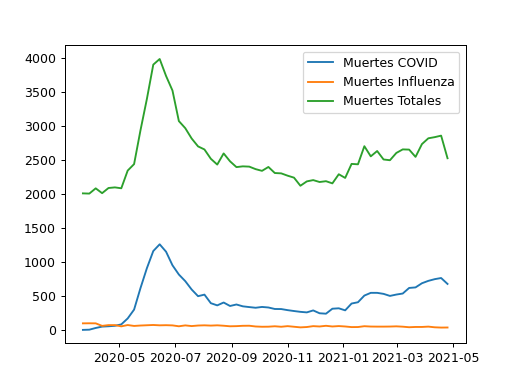

<IPython.core.display.Javascript object>


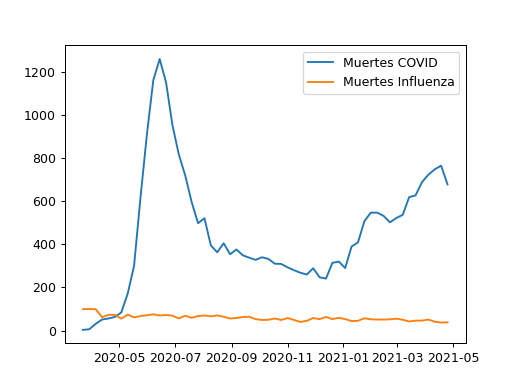

<IPython.core.display.Javascript object>


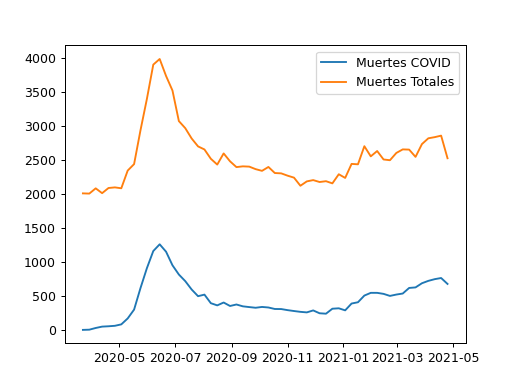

In [65]:
x1 = muertes['M_COVID']
x2 = muertes['M_INFLUENZA']
x3 = muertes['M_TOTALES']
y = muertes['Fecha']

#fig = plt.figure(figsize = [10,5])
#plt.plot(x1, label = 'Muertes COVID')
#plt.plot(x2, label ='Muertes Influenza')
#plt.plot(x3, label ='Muertes Covid')
#plt.legend()
#plt.show()

fig, ax = plt.subplots()
ax.plot(y, x1, label = 'Muertes COVID')
ax.plot(y, x2, label ='Muertes Influenza')
ax.plot(y, x3, label ='Muertes Totales')
plt.legend()
plt.show()



fig, ax = plt.subplots()
ax.plot(y, x1, label = 'Muertes COVID')
ax.plot(y, x2, label ='Muertes Influenza')
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(y, x1, label = 'Muertes COVID')
ax.plot(y, x3, label ='Muertes Totales')
plt.legend()
plt.show()





<IPython.core.display.Javascript object>


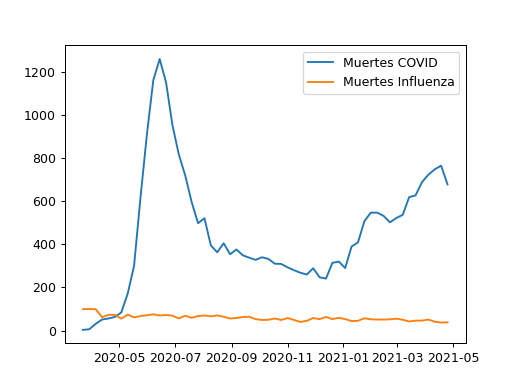

In [63]:
fig, ax = plt.subplots()
ax.plot(y, x1, label = 'Muertes COVID')
ax.plot(y, x2, label ='Muertes Influenza')



plt.legend()
plt.show()
